In [5]:

import numpy as np

from lmfit import Parameters, Minimizer, fit_report, conf_interval, report_ci
import matplotlib.pyplot as plt


def volume_fcn2(T, a0, a1, a2, a3, a4, a5, a6, a7, a8):
    x = T/1000
    return a0*np.exp( a1*a2/(np.exp(a2/x)-1)
                     +a3*a4/(np.exp(a4/x)-1)
                     +a5*a6/(np.exp(a6/x)-1)
                     +a7*a8/(np.exp(a8/x)-1))

def CET_fcn2(T, a0, a1, a2, a3, a4, a5, a6, a7, a8):
    x = T/1000
    CTE =   (((a1*a2**2.0*np.exp(a2/x))/((x**2.0)*(np.exp(a2/x)-1)**2.0))
            +((a3*a4**2.0*np.exp(a4/x))/((x**2.0)*(np.exp(a4/x)-1)**2.0))
            +((a5*a6**2.0*np.exp(a6/x))/((x**2.0)*(np.exp(a6/x)-1)**2.0))
            +((a7*a8**2.0*np.exp(a8/x))/((x**2.0)*(np.exp(a8/x)-1)**2.0))
           )/1000
    return CTE

def CET_numerical(T,V):
    #linear extrapolation of volume at T=0
    v0 = V[0]-((V[1]-V[0])/(T[1]-T[0]))*T[0]
    T = np.insert(T, 0, 0.0)
    V = np.insert(V, 0, v0)
    CET = [0.0]
    for i in range(1,len(T)):
        CET.append((1.0/V[i])*(V[i]-V[i-1])/(T[i]-T[i-1]))
    return np.array(CET[1:])

def func2min2(params, T, V, CET):
    parametros = [params[k] for k in params.keys()]
    model_vol = volume_fcn2(T, *parametros)
    residual_vol = model_vol - V  
    return residual_vol

def fit_volume_vs_temperature2(T, V, CET, verbose=True):
    params = Parameters()
    params.add('a0', value=7000, min=0, max=9000, vary=True)
    params.add('a1', value=0.1, min=-50, max=50, vary=True)
    params.add('a2', value=0.01, min=0.001,max=3.5, vary=True)
    params.add('a3', value=0.1, min=-50, max=50, vary=True)
    params.add('a4', value=0.1, min=0.001,max=3.5, vary=True)
    params.add('a5', value=0., min=-100, max=100,vary=False)
    params.add('a6', value=1., min=0.001,max=3.5,vary=False)
    params.add('a7', value=0., min=-100, max=100,vary=False)
    params.add('a8', value=1., min=0.001,max=3.5,vary=False)
  
    minimizer = Minimizer(func2min2, params, fcn_args=(T, V, CET))
    out = minimizer.minimize(method='ampgo')#, **kws) 
    fit = func2min2(out.params, T, V,CET)
    if verbose:
        print(fit_report(out), flush=True)
        print('Cost:',np.sum(fit))
        print('---------- DE bounds ----------')
        for k in out.params.keys():
            print('{0:3}:  {1: >8}\t{2: >12.6g}\t{3: >8}'.format(k,out.params[k].min,out.params[k].value,out.params[k].max))
        
    return out

def second_fit2(T,V,CET,out, verbose=True):
    minimizer = Minimizer(func2min2, out.params, fcn_args=(T, V, CET))
    result2 = minimizer.minimize(method='nelder')
    if verbose:
        print(fit_report(result2), flush=True)
    return result2

def plot2(x_data, y_data, x_fit, y_fit, z_data, z_fit, file):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,dpi=120,figsize=(10,3))
    ax1.plot(x_data, y_data, 'o', label='data')
    ax1.plot(x_fit, y_fit, '-',label='fit')
    ax1.set_ylabel('Volume (A3)')
    ax1.set_xlabel('Temperature (K)')
    ax1.legend()
    
    ax2.plot(x_data, 1e6*z_data, 'x',label='Data')
    ax2.plot(x_fit, 1e6*z_fit, label='Fit')
    ax2.set_xlabel('Temperature (K)')
    ax2.set_ylabel('CET (K$^{-6}$)')
    ax2.legend()
    plt.suptitle(file)
    plt.savefig(file.rstrip('dat')+'png')
    plt.show()

######################### ./volume_vs_temperature.dat ##########################
Fitting 1
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 26550
    # data points      = 30
    # variables        = 5
    chi-square         = 2.5523e-06
    reduced chi-square = 1.0209e-07
    Akaike info crit   = -478.391423
    Bayesian info crit = -471.385436
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1963095 +/- 7.5649e-05 (0.00%) (init = 7000)
    a1: -38.1781891 +/-        nan (nan%) (init = 0.1)
    a2:  1.65413853 +/- 8.3403e-04 (0.05%) (init = 0.01)
    a3:  38.1189167 +/-        nan (nan%) (init = 0.1)
    a4:  1.65281770 +/- 6.8906e-04 (0.04%) (init = 0.1)
    a5:  0 (fixed)
    a6:  1 (fixed)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, a4) =  1.014
    C(a0, a4) =  0.487
    C(a0, a2) =  0.365
Cost: 0.060281252669049934
---------- DE bounds ---

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


    Better solution found. Cost:0.06195425959101186
Fitting 2
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 24624
    # data points      = 30
    # variables        = 5
    chi-square         = 3.4254e-06
    reduced chi-square = 1.3702e-07
    Akaike info crit   = -469.564807
    Bayesian info crit = -462.558820
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1964024 +/- 9.1919e-05 (0.00%) (init = 7000)
    a1: -42.4620425 +/-        nan (nan%) (init = 0.1)
    a2:  1.29595723 +/-        nan (nan%) (init = 0.01)
    a3:  42.4761960 +/-        nan (nan%) (init = 0.1)
    a4:  1.29558895 +/-        nan (nan%) (init = 0.1)
    a5:  0 (fixed)
    a6:  1 (fixed)
    a7:  0 (fixed)
    a8:  1 (fixed)
Cost: 0.19577754520157953
---------- DE bounds ----------
a0 :         0	     46.1964	    9000
a1 :       -50	     -42.462	      50
a2 :     0.001	     1.29596	     3.5
a3 :       -50	     42.4762	      50


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


Fitting 3
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 37212
    # data points      = 30
    # variables        = 5
    chi-square         = 1.0433e-05
    reduced chi-square = 4.1730e-07
    Akaike info crit   = -436.153410
    Bayesian info crit = -429.147423
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1961443 +/- 1.4949e-04 (0.00%) (init = 7000)
    a1:  34.8755880 +/-        nan (nan%) (init = 0.1)
    a2:  1.85106154 +/- 0.02508323 (1.36%) (init = 0.01)
    a3: -35.1574579 +/-        nan (nan%) (init = 0.1)
    a4:  1.85498032 +/- 0.02566074 (1.38%) (init = 0.1)
    a5:  0 (fixed)
    a6:  1 (fixed)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, a4) =  1.000
    C(a0, a4) = -0.125
    C(a0, a2) = -0.122
Cost: 0.02959370389130811
---------- DE bounds ----------
a0 :         0	     46.1961	    9000
a1 :       -50	     34.8756	      50


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


    Better solution found. Cost:0.0365409713181748
Fitting 4
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 24918
    # data points      = 30
    # variables        = 5
    chi-square         = 1.9011e-05
    reduced chi-square = 7.6045e-07
    Akaike info crit   = -418.150141
    Bayesian info crit = -411.144154
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1968271 +/- 2.0818e-04 (0.00%) (init = 7000)
    a1:  0.81670759 +/- 0.73113235 (89.52%) (init = 0.1)
    a2:  2.34730616 +/- 0.23692677 (10.09%) (init = 0.01)
    a3: -15.5633898 +/- 5.85720124 (37.63%) (init = 0.1)
    a4:  3.48799900 +/-        nan (nan%) (init = 0.1)
    a5:  0 (fixed)
    a6:  1 (fixed)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a2) =  0.994
    C(a1, a3) = -0.946
    C(a2, a3) = -0.894
    C(a0, a2) =  0.422
    C(a0, a1) =  0.379
    C(a0, a3) = -0.223


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


Cost: 0.00010582398365244217
---------- DE bounds ----------
a0 :         0	     46.1968	    9000
a1 :       -50	    0.816708	      50
a2 :     0.001	     2.34731	     3.5
a3 :       -50	    -15.5634	      50
a4 :     0.001	       3.488	     3.5
a5 :      -100	           0	     100
a6 :     0.001	           1	     3.5
a7 :      -100	           0	     100
a8 :     0.001	           1	     3.5
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 2278
    # data points      = 30
    # variables        = 5
    chi-square         = 4.9570e-07
    reduced chi-square = 1.9828e-08
    Akaike info crit   = -527.554964
    Bayesian info crit = -520.548977
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1961720 +/- 3.7122e-05 (0.00%) (init = 46.19683)
    a1:  0.40358564 +/-        nan (nan%) (init = 0.8167076)
    a2:  1.00591884 +/- 0.01767921 (1.76%) (init = 2.347306)
    a3: -0.39551401 +/-        nan (nan%) (init = -15.56339)
    a4:  1

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


    Better solution found. Cost:0.0060377983742725405
Fitting 5
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 29712
    # data points      = 30
    # variables        = 5
    chi-square         = 7.9662e-07
    reduced chi-square = 3.1865e-08
    Akaike info crit   = -513.322712
    Bayesian info crit = -506.316725
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1961750 +/- 5.0185e-05 (0.00%) (init = 7000)
    a1:  25.0303297 +/-        nan (nan%) (init = 0.1)
    a2:  0.79466035 +/- 2.1111e-04 (0.03%) (init = 0.01)
    a3: -25.0235275 +/-        nan (nan%) (init = 0.1)
    a4:  0.79433334 +/- 2.1085e-04 (0.03%) (init = 0.1)
    a5:  0 (fixed)
    a6:  1 (fixed)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, a4) =  1.000
Cost: -0.44875760605293635
---------- DE bounds ----------
a0 :         0	     46.1962	    9000
a1 :       -50	     25.0303	

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


Fitting 6
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 27036
    # data points      = 30
    # variables        = 5
    chi-square         = 1.9119e-05
    reduced chi-square = 7.6476e-07
    Akaike info crit   = -417.980678
    Bayesian info crit = -410.974691
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1968020 +/- 1.9175e-04 (0.00%) (init = 7000)
    a1:  37.4334416 +/- 0.64825444 (1.73%) (init = 0.1)
    a2:  2.76231987 +/- 0.02435095 (0.88%) (init = 0.01)
    a3: -46.8739201 +/-        nan (nan%) (init = 0.1)
    a4:  2.84612929 +/- 0.02582699 (0.91%) (init = 0.1)
    a5:  0 (fixed)
    a6:  1 (fixed)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, a4) =  0.978
    C(a1, a4) = -0.408
    C(a0, a2) =  0.372
    C(a0, a4) =  0.331
    C(a1, a2) = -0.155
    C(a0, a1) =  0.134


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


Cost: 0.001389368417179071
---------- DE bounds ----------
a0 :         0	     46.1968	    9000
a1 :       -50	     37.4334	      50
a2 :     0.001	     2.76232	     3.5
a3 :       -50	    -46.8739	      50
a4 :     0.001	     2.84613	     3.5
a5 :      -100	           0	     100
a6 :     0.001	           1	     3.5
a7 :      -100	           0	     100
a8 :     0.001	           1	     3.5
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1093
    # data points      = 30
    # variables        = 5
    chi-square         = 1.2847e-05
    reduced chi-square = 5.1388e-07
    Akaike info crit   = -429.907824
    Bayesian info crit = -422.901837
[[Variables]]
    a0:  46.1966517 +/- 1.7721e-04 (0.00%) (init = 46.1968)
    a1:  9.75645043 +/- 6.06892177 (62.20%) (init = 37.43344)
    a2:  2.48488574 +/- 0.21151666 (8.51%) (init = 2.76232)
    a3: -12.8724622 +/- 8.29475438 (64.44%) (init = -46.87392)
    a4:  2.59433408 +/- 0.25349052 (9.77%) (init = 2.846129)
 

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


    Better solution found. Cost:0.0007096558062471559
Good cost achieved. Stopping. Final cost: 0.0007096558062471559


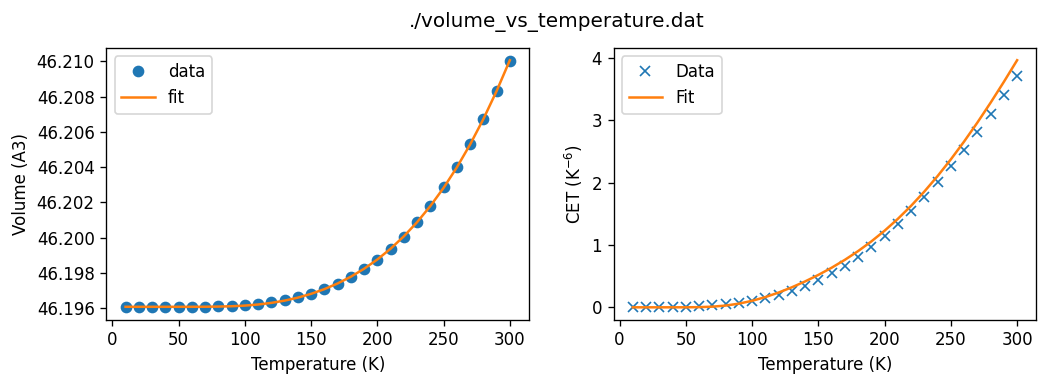

In [6]:

file = './volume_vs_temperature.dat'
print('{0:#^80}'.format(' '+str(file)+' '))
        
M = np.genfromtxt(file)
temperature = M[:,0]
volume = M[:,1]
cte_data = CET_numerical(temperature, volume)

#tenta varios fittings até obter um custo baixo ou atingir o maximo de iteracoes
max_nfits = 10
best_cost = np.inf
cost_threshold = 0.005
cost = 1.0
for count in range(1,max_nfits+1):
    print(f'Fitting {count}')
    result0 = fit_volume_vs_temperature2(temperature, volume, cte_data, verbose=True)
    result = second_fit2(temperature, volume, cte_data, result0, verbose=True)
    params = [result.params[k].value for k in result.params.keys()]
    cost = np.sum(abs(func2min2(result.params, temperature, volume, cte_data)))
    if cost < best_cost:
        best_cost = cost
        best_params = list(params)
        print(f'    Better solution found. Cost:{cost}')
    if (cost<=cost_threshold):
        print(f'Good cost achieved. Stopping. Final cost: {cost}')
        break
        
if count == max_nfits:
    print(f'Max fittings achieved. Stopping and showing best result. Final cost:{cost}')
    
t_fit = np.array(temperature)
(a0, a1, a2, a3, a4, a5, a6, a7, a8) = (best_params)
v_nominal = volume_fcn2(t_fit,a0, a1, a2, a3, a4, a5, a6, a7, a8)
cte_nominal = CET_fcn2(t_fit,a0, a1, a2, a3, a4, a5, a6, a7, a8)
plot2(temperature, volume, t_fit, v_nominal, cte_data, cte_nominal, file)

v_unc = np.zeros(len(v_nominal))
cte_unc = np.zeros(len(v_nominal))       
with open(file.rstrip('dat')+'fit','w') as f:
    f.write('#{T:5}\t{V:10}\t{Vfit:10}\t{Vunc:10}\t{CET:10}\t{CETfit:10}\t{CETunc:10}\n'.format(T='T(K)',V='V(A3)',Vfit='Vfit(A3)',Vunc='Vunc(A3)',CET='CET(1/K)',CETfit='CETfit(1/K)',CETunc='CETunc(1/K)'))
    for i in range(len(temperature)):
        f.write('{T:5.1f}\t{V:10f}\t{Vfit:10f}\t{Vunc:10f}\t{CET: 10e}\t{CETfit: 10e}\t{CETunc: 10e}\n'.format(T=temperature[i],V=volume[i],Vfit=v_nominal[i],Vunc=v_unc[i],CET=cte_data[i],CETfit=cte_nominal[i],CETunc=cte_unc[i]))

